In [226]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

### 圆/三角形


#### Adapted from  https://github.com/MathAndAlgo/DiscussionBoard/issues/7 @guofei9987
def func1_metric(x,x1,x2,is_theta=1):
    # is_theta=1,说明x输入的是极坐标，
    # is_theta=0,说明x输入的是笛卡尔坐标
    if is_theta==1:
        x=[np.cos(x),np.sin(x)]
    elif is_theta==0:
        x=[0,0]
    x1=[np.cos(x1),np.sin(x1)]
    x2=[np.cos(x2),np.sin(x2)]
    return (x[1]-x1[1])*(x2[0]-x1[0])-(x2[1]-x1[1])*(x[0]-x1[0])

def is_in(tri_a):
#     tri_a = np.array(tri_a)
    for i in range(3):
        tri_a_temp=tri_a[:]
        tri_a_x0=list(tri_a_temp).pop(i)
        if func1_metric(tri_a_x0,tri_a_temp[0],tri_a_temp[1])*func1_metric(0,tri_a_temp[0],tri_a_temp[1],is_theta=0)<0:
            return 0
    return 1

def is_in__angle(tri_a):
    '''
    通过判断是否为三角形得出圆心相对三角形位置（直角三角形圆心在斜边上）
    输入：（3,）阵列或 (n,3)阵列
    '''
    tri_a.sort(axis = -1)
    if tri_a.ndim is 1:
        tri_a = tri_a[None,:]
    tri_a = np.hstack([tri_a, tri_a[:,0:1] + 2*np.pi])
    angs = np.diff(tri_a,axis = -1)
    return angs.max(axis = -1,keepdims = 1) < np.pi

if __name__ =='__main__':
    tri_a = np.random.uniform(low=0,high=2*np.pi,size=(20,3))
    is_in__angle(tri_a)

In [224]:
tri_a = np.random.uniform(low=0,high=2*np.pi,size=(3,))
%timeit is_in__angle(tri_a)
%timeit is_in(tri_a)

The slowest run took 13.47 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 17.1 µs per loop
10000 loops, best of 3: 63.1 µs per loop


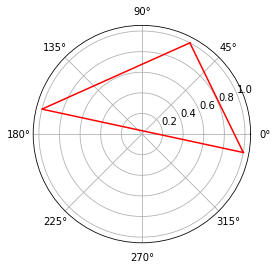

不在内部


In [217]:
tri_a=np.random.uniform(low=0,high=2*np.pi,size=3)
plt.subplot(111,polar=True)
plt.plot(tri_a,[1,1,1],'r')
plt.plot([tri_a[0],tri_a[-1]],[1,1],'r')
plt.show()
if is_in__angle(tri_a)[0]==0:
    print('不在内部')
else: print('在内部')

In [232]:
total_counts=100000
tri_a=np.random.uniform(low=0,high=2*np.pi,size=(total_counts,3))
res = is_in__angle(tri_a)
prob = res.mean()
print 'simulations: %d, in_prob: %f'%(total_counts,prob )


simulations: 100000, in_prob: 0.249440
